In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## On minimise une fonction, connue analytiquement
def J(theta):
    return np.sin((theta+1)**2)-theta/10+theta**4/30

$$J(\theta) = \sin\Big((\theta+1)^2\Big) - \frac{\theta}{10} + \frac{\theta^4}{30}$$

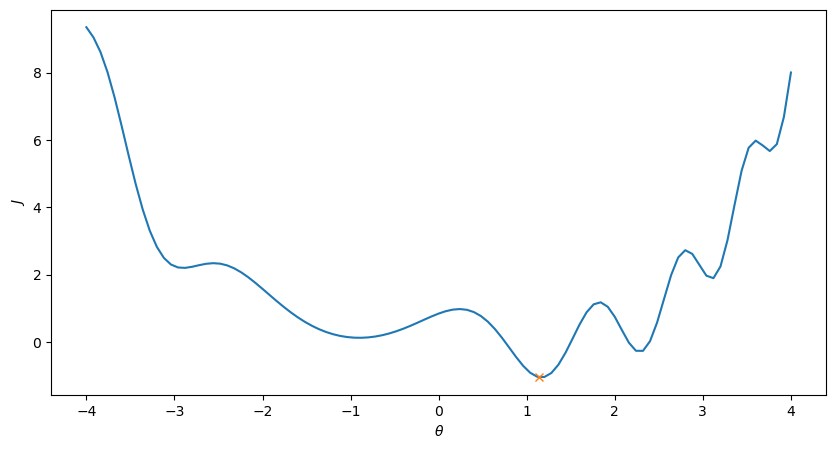

In [17]:
xs= np.linspace(-4,4, 101)
ys = J(xs) 

plt.figure(1,[10,5])
plt.plot(xs,ys)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J$")

plt.plot([1.14], [J(1.14)], marker='x')

# Descente de gradient

Implémentez la descente de gradient pour cette fonction. Observez le résultat pour différentsz choix de taux d'apprentissage $\eta$ (`eta`) et différentes positions initiales $\Theta_0$.


Vous pouvez vous référer à ce qui a été vu en `Descente de Gradient - topo.ipynb` pour trouver les étapes. Les grande étapes sont:
- calculez le gradient (la dérivée, ici, car 1 seule variable) de J
- écrivez le code pour la descente de gradient

Remarque: si vous avez des difficultés avec les dérivées mais que vous êtes bon en code, vous pouvez aussi tenter de calculer une dérivée approximative en évaluant `J` en de très nombreux points, et en prenant la pente locale comme une approximation de la dérivée. Votre code sera cependant plus compliqué, moins précis, et en plus, ce n'est typiquement *pas* la stratégie adoptée en Machine Learning (mais bon, c'est une technique de programmation scientifique qui peut être utile ailleurs).

In [7]:
def Jprime(theta):
    return 2*np.cos((theta+1)**2)*(theta+1) -1./10 + 4/30*theta**3

In [10]:
Jprime(np.array([2,3,4]))

array([-4.5001149 , -4.16127584, 18.34536145])

In [11]:
theta0 = 1
eta = 0.01
ITERMAX =10

theta = theta0

theta = theta - eta * Jprime(theta)

In [12]:
theta

1.025812411501211

In [13]:
for i in range(ITERMAX):
    theta = theta - eta * Jprime(theta)

In [14]:
theta

1.145677889118266

In [32]:
theta0 = 1
eta = 0.01
ITERMAX =10
def descenteDeGradient(theta0, eta, ITERMAX):
    thetas_values = np.zeros(ITERMAX)
    theta = theta0
    for i in range(ITERMAX):
        thetas_values[i] = theta
        theta = theta - eta * Jprime(theta)
        
    return thetas_values

In [33]:
theta0 = 2
eta = 0.01
ITERMAX =10
thetas_values =  descenteDeGradient(theta0, eta, ITERMAX)

Bonus: si vous avez terminé la descente de gradient, que vous convergez vers un minimum local (en faisant varier `eta`, le nombre d'itérations et la valeur initiale de `theta`), ajoutez à votre code le suivi des valeurs de $J(\theta)$ au cours des itérations. Concrètement, si on note $\theta^{(i)}$ la $i$-ème itération (époque) de votre algorithme de descente de gradient, il faut tracer $J(\theta^{(i)})$ en fonction de $i$. 

Ce genre de suivi peut toujours etre fait, même pour un problème de grande dimension (c.a.d. quand $\theta \in \mathbb{R}^D$ avec $D$ grand), car $J(\theta) \in \mathbb{R}$ peut être affiché, contrairement à $\theta \in \mathbb{R}^D$) et permet d'affiner le choix de `eta`: selon que la courbe remonte ou descend trop lentement, on peut ajuster. 




In [34]:
J(thetas_values)

array([ 0.74545182,  0.53063166,  0.28003449,  0.04290542, -0.13074959,
       -0.22856947, -0.27283344, -0.29006147, -0.29618902, -0.29826177])

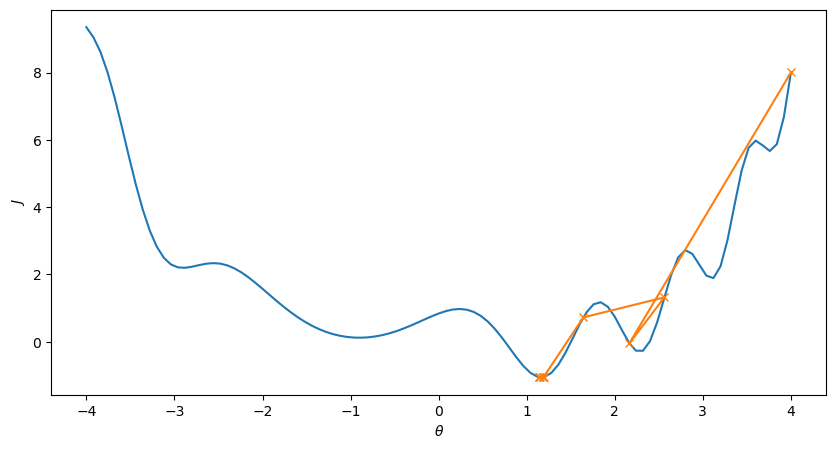

In [35]:
theta0 = 4
eta = 0.1
ITERMAX =10
thetas_values =  descenteDeGradient(theta0, eta, ITERMAX)


xs= np.linspace(-4,4, 101)
ys = J(xs) 

plt.figure(1,[10,5])
plt.plot(xs,ys)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J$")

plt.plot(thetas_values, J(thetas_values), marker='x')